In [352]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [75]:
caminho = "../input/nyght_user_tweets-2.xlsx"
arquivo = pd.read_excel(caminho)

In [76]:
df = pd.DataFrame(arquivo)
df.head()

,Text,CreatedAt,TweetType
0,"nossa, que incrível, obg ms óbvio , vc salvou ...",Wed Oct 17 20:44:22 +0000 2018,Tweet
1,"@caioloup calma.\n\ngood kid, m.A.A.d city",Wed Oct 17 20:47:09 +0000 2018,Reply
2,@xaysnm KKKKKKKKKKKKKKKKKKKKKJKKK serio isso?pqp,Wed Oct 17 20:54:46 +0000 2018,Reply
3,Vikings do capão redondo,Wed Oct 17 20:55:28 +0000 2018,Tweet
4,https://t.co/58n6bj7fq5,Wed Oct 17 21:25:56 +0000 2018,Tweet


In [77]:
for c in range(0, len(df["CreatedAt"])):
    df["CreatedAt"][c] = df["CreatedAt"][c][0:10]
df.head()

,Text,CreatedAt,TweetType
0,"nossa, que incrível, obg ms óbvio , vc salvou ...",Wed Oct 17,Tweet
1,"@caioloup calma.\n\ngood kid, m.A.A.d city",Wed Oct 17,Reply
2,@xaysnm KKKKKKKKKKKKKKKKKKKKKJKKK serio isso?pqp,Wed Oct 17,Reply
3,Vikings do capão redondo,Wed Oct 17,Tweet
4,https://t.co/58n6bj7fq5,Wed Oct 17,Tweet


In [78]:
df = df[df.TweetType != "Reply"]
df = df[df.TweetType != "Retweet"]
df = df.reset_index(drop=True)
df.head()

,Text,CreatedAt,TweetType
0,"nossa, que incrível, obg ms óbvio , vc salvou ...",Wed Oct 17,Tweet
1,Vikings do capão redondo,Wed Oct 17,Tweet
2,https://t.co/58n6bj7fq5,Wed Oct 17,Tweet
3,CARALHO https://t.co/QC0RFjIAbg,Wed Oct 17,Tweet
4,"!!!atenção!!!\n\nnada não, esqueci",Wed Oct 17,Tweet


In [79]:
df.shape

(1270, 3)

In [80]:
df2 = pd.DataFrame(df["Text"])
df2.head()

,Text
0,"nossa, que incrível, obg ms óbvio , vc salvou ..."
1,Vikings do capão redondo
2,https://t.co/58n6bj7fq5
3,CARALHO https://t.co/QC0RFjIAbg
4,"!!!atenção!!!\n\nnada não, esqueci"


In [155]:
lista = []
for c in range(0, len(df2["Text"])):
    for d in df2["Text"][c].split(' '):
        lista.append(d)

v = []
for e in lista:
    v.append(lista.count(e))

In [156]:
df3 = pd.DataFrame([lista, v], index=["Palavra", "Quantidade"]).T
df3['Palavra'] = df3['Palavra'].str.replace('http\S+|www.\S+|@\S+', '', case=False)
df3 = df3[df3.Palavra != '']
df3 = df3[df3.Palavra != ',']
df3 = df3[~df3.Palavra.str.contains(r'[0-9]')]
df3 = df3.reset_index(drop=True)
df3 = df3.drop_duplicates()
df3 = df3.sort_values('Quantidade')
# 13029
# 12122
# 4372
# 4331
# 4315
# 4282
# 4271
# 4241
# 4240

In [332]:
# Linha usada para tirar pontuações, foi substituido , por qualquer outro simbolo
# u"\U0001F600-\U0001F64F"
df3["Palavra"] = df3["Palavra"].replace('\🌟💛','',regex=True).astype(str)
df3 = df3.apply(lambda x: x.astype(str).str.lower()) #--> Colocando tudo em minusculo
#df3["Palavra"] = df3.Palavra.str.replace('[^a-zA-Z]', '') --> Remover 
df3 = df3[df3.Palavra != ''] # --> removendo linhas vazias
#df3[:2050]
df3.shape

(4240, 2)

In [336]:
df4 = pd.DataFrame(df3[:2050])
df4 = df4.reset_index(drop=True)
df4.head()

,Palavra,Quantidade
0,nossa,1
1,religião,1
2,demência,1
3,coletiva,1
4,bakunin,1


In [339]:
lista2 = []
for c in range(0, len(df4["Palavra"])):
    for d in df4["Palavra"][c].split(' '):
        lista2.append(d)

v2 = []
for e in lista2:
    v2.append(lista2.count(e))

In [340]:
df5 = pd.DataFrame([lista2, v2], index=["Palavra", "Quantidade"]).T
df5.head()

,Palavra,Quantidade
0,nossa,3
1,religião,1
2,demência,1
3,coletiva,1
4,bakunin,1


In [349]:
df5 = df5.sort_values('Quantidade', ascending=False)
df5 = df5.reset_index(drop=True)
df5 = df5.drop_duplicates()
df5[10:20]

,Palavra,Quantidade
10,brasil,3
11,_\|/_,3
12,rock,3
13,a,3
14,horrível,3
15,ok,3
16,obrigada,3
17,nossa,3
18,isso,3
19,gangue,2


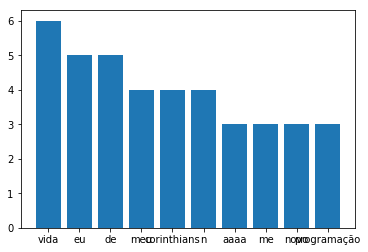

In [356]:
plt.figure(figsize=(10,10))
plt.bar(df5["Palavra"][0:10], df5["Quantidade"][0:10])

plt.show()

In [83]:
# dataf = dataf[dataf.Palavra != '😍😍😍'] --> Exatamente o texto entre aspas
# dataf = dataf[~dataf.Palavra.str.contains("https://t.co/")] --> Se contem o texto entre aspas em alguma parte da frase
# dataf2 = dataf.sort_values('Quantidade', ascending=False) --> Classificar por coluna
# dataf3 = dataf2.drop_duplicates() --> Remover duplicidade